<a href="https://www.kaggle.com/code/nairav/1st-ds-assignment?scriptVersionId=112544909" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/price-prediction/DS - Assignment Part 1 data set.xlsx
/kaggle/input/house/submission_gb.csv


In [2]:
import pandas as pd
from  matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr

In [3]:
file = ('/kaggle/input/price-prediction/DS - Assignment Part 1 data set.xlsx')

In [4]:
df =  pd.read_excel(file)

In [5]:
final_data = df.rename(columns = {'House size (sqft)':'House_size_sqft' , 'House price of unit area':'House_price_of_unit_area', 'Number of bedrooms': 'Number_of_bedrooms' } )
    

In [6]:
final_data['total price'] = final_data.apply(lambda row : row.House_size_sqft*row.House_price_of_unit_area, axis =1)

**created new column "total price" into the dataframe by multiplying column "House_size_sqft" and "house_price_ per_unit_area"**

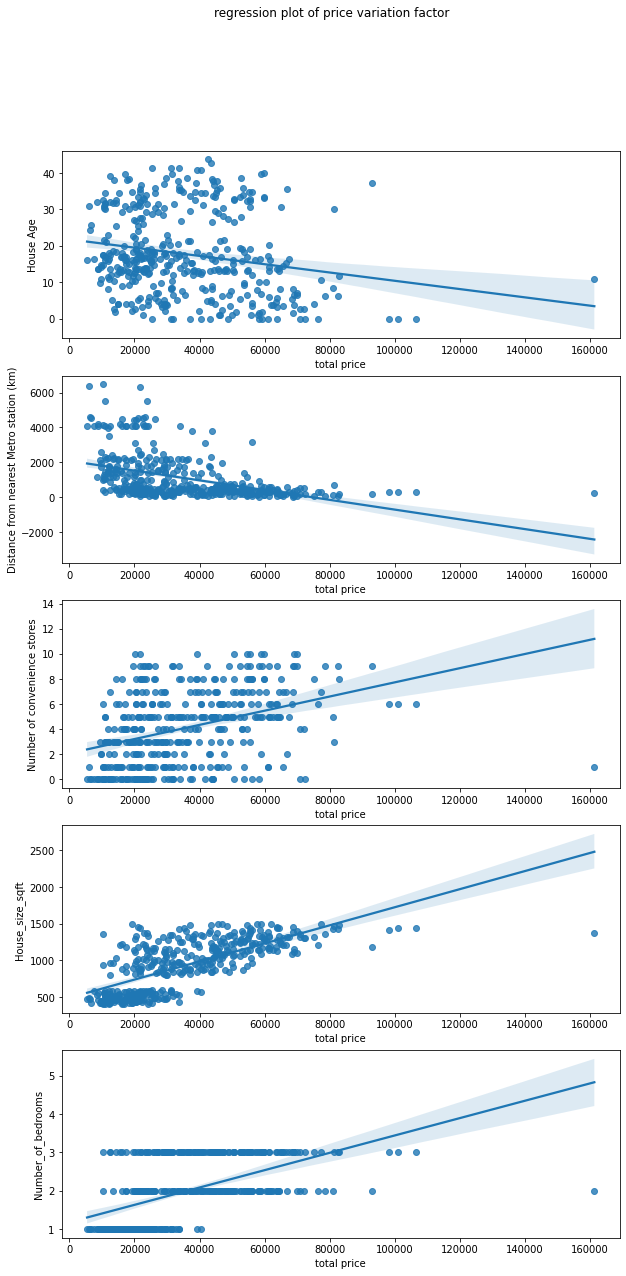

In [7]:
fig, axes = plt.subplots(5 ,figsize=(10, 20))
fig.suptitle('regression plot of price variation factor')

sns.regplot(ax=axes[0], data=final_data, x='total price', y='House Age')
sns.regplot(ax=axes[1], data=final_data, x='total price', y='Distance from nearest Metro station (km)')
sns.regplot(ax=axes[2], data=final_data, x='total price', y='Number of convenience stores')
sns.regplot(ax=axes[3], data=final_data, x='total price', y='House_size_sqft')
sns.regplot(ax=axes[4], data=final_data, x='total price', y='Number_of_bedrooms')
plt.savefig('regression_plot.pdf')


**ploted regression plot using seaborn library to check which factor is making more effect on house price variation**

In [8]:
pearsons_coefficient1,p_value1 = pearsonr(final_data['total price'],final_data['House Age'])
print("pearson coefficient is ", pearsons_coefficient1 ,'\n and p_valu is ', p_value1)

pearson coefficient is  -0.19874057167019513 
 and p_valu is  4.656344053454676e-05


In [9]:
pearsons_coefficient2,p_value2 = pearsonr(final_data['total price'] ,final_data['Distance from nearest Metro station (km)'])
print("pearson coefficient is ", pearsons_coefficient2 ,'\n and p_valu is ', p_value2)

pearson coefficient is  -0.44109351386692913 
 and p_valu is  3.87175729236637e-21


In [10]:
pearsons_coefficient3,p_value3 = pearsonr(final_data['total price'] ,final_data['House_size_sqft'])
print("pearson coefficient is ", pearsons_coefficient3 ,'\n and p_valu is ', p_value3)

pearson coefficient is  0.7027822005853684 
 and p_valu is  6.584541102479006e-63


In [11]:
pearsons_coefficient4,p_value4 = pearsonr(final_data['total price'] ,final_data['Number of convenience stores'])
print("pearson coefficient is ", pearsons_coefficient4 ,'\n and p_valu is ', p_value4)

pearson coefficient is  0.3811691473706909 
 and p_valu is  9.158438639257306e-16


In [12]:
pearsons_coefficient5,p_value5 = pearsonr(final_data['total price'],final_data['Number_of_bedrooms'])
print("pearson coefficient is ", pearsons_coefficient5 ,'\n and p_valu is ', p_value5)

pearson coefficient is  0.5486785373646094 
 and p_valu is  6.43642009848717e-34


In [13]:
list1= [pearsons_coefficient1,pearsons_coefficient2,pearsons_coefficient3,pearsons_coefficient4,pearsons_coefficient5]
list1

[-0.19874057167019513,
 -0.44109351386692913,
 0.7027822005853684,
 0.3811691473706909,
 0.5486785373646094]

**we can see here "house_size_per_ sqrt" have the highest corelation with the "house price" as we know the pearsons coefficient nearest to the 1 and -1 shows the highest corelation.  **

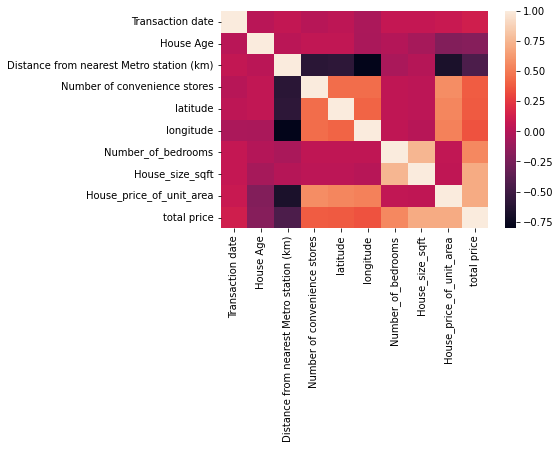

In [14]:
corr = final_data.corr()
dataplot = sns.heatmap(final_data.corr())
plt.savefig('heatmap.pdf',dpi = 400)  

